In [1]:
import pandas as pd

# df_simulado = {
#     'modelo': ['Modelo A', 'Modelo B', 'Modelo C', 'Modelo A', 'Modelo D'],
#     'marca': ['Marca X', 'Marca Y', 'Marca Z', 'Marca X', 'Marca W'],
#     'ano_pesquisa': ['1st Wave of 2022', '2nd Wave of 2022', '1st Wave of 2023', '2nd Wave of 2023', '1st Wave of 2024'],
#     'produto': ['Poltrona', 'Volante', 'Conforto', 'Preço', 'Desempenho'],
#     'comentario': [
#         'A poltrona do carro é desconfortável após algumas horas de uso.',
#         'O volante parece pequeno, mas tem uma boa aderência.',
#         'O conforto geral do carro é excelente, especialmente em longas viagens.',
#         'O preço está um pouco acima da média comparado a outros modelos.',
#         'O desempenho do carro é incrível, com aceleração rápida e ótima estabilidade.'
#     ]
# }

df_simulado = {
    'modelo': ['Modelo A', 'Modelo B', 'Modelo C', 'Modelo A', 'Modelo D', 
               'Modelo E', 'Modelo F', 'Modelo G', 'Modelo H', 'Modelo I'],
    'marca': ['Marca X', 'Marca Y', 'Marca Z', 'Marca X', 'Marca W', 
              'Marca V', 'Marca U', 'Marca T', 'Marca X', 'Marca R'],
    'ano_pesquisa': ['1st Wave of 2022', '2nd Wave of 2022', '1st Wave of 2023', '2nd Wave of 2023', '1st Wave of 2024',
                     '1st Wave of 2022', '2nd Wave of 2022', '1st Wave of 2023', '2nd Wave of 2023', '1st Wave of 2024'],
    'produto': ['Poltrona', 'Volante', 'Conforto', 'Preço', 'Desempenho',
                'Suspensão', 'Freios', 'Consumo', 'Poltrona', 'Design'],
    'comentario': [
        'A poltrona do carro é desconfortável após algumas horas de uso.',
        'O volante parece pequeno, mas tem uma boa aderência.',
        'O conforto geral do carro é excelente, especialmente em longas viagens.',
        'O preço está um pouco acima da média comparado a outros modelos.',
        'O desempenho do carro é incrível, com aceleração rápida e ótima estabilidade.',
        'A suspensão é muito macia, absorvendo bem os impactos na estrada.',
        'Os freios são precisos, mas em longas distâncias começam a aquecer.',
        'O consumo de combustível é alto, especialmente em viagens longas.',
        'A poltrona do é ruim, pois não ajusta bem ao meu perfil.',
        'O design é moderno e elegante, mas a pintura risca facilmente.'
    ]
}

df_simulado = pd.DataFrame(df_simulado)


In [2]:
print(df_simulado)

     modelo    marca      ano_pesquisa     produto  \
0  Modelo A  Marca X  1st Wave of 2022    Poltrona   
1  Modelo B  Marca Y  2nd Wave of 2022     Volante   
2  Modelo C  Marca Z  1st Wave of 2023    Conforto   
3  Modelo A  Marca X  2nd Wave of 2023       Preço   
4  Modelo D  Marca W  1st Wave of 2024  Desempenho   
5  Modelo E  Marca V  1st Wave of 2022   Suspensão   
6  Modelo F  Marca U  2nd Wave of 2022      Freios   
7  Modelo G  Marca T  1st Wave of 2023     Consumo   
8  Modelo H  Marca X  2nd Wave of 2023    Poltrona   
9  Modelo I  Marca R  1st Wave of 2024      Design   

                                          comentario  
0  A poltrona do carro é desconfortável após algu...  
1  O volante parece pequeno, mas tem uma boa ader...  
2  O conforto geral do carro é excelente, especia...  
3  O preço está um pouco acima da média comparado...  
4  O desempenho do carro é incrível, com aceleraç...  
5  A suspensão é muito macia, absorvendo bem os i...  
6  Os freios são pre

In [3]:
import re

# Lista de stop words em português (pode ser ajustada conforme necessário)
stop_words = ['a', 'o', 'é', 'de', 'do', 'da', 'os', 'as', 'em', 'por', 'para', 'com', 'no', 'na', 'que', 'um', 'uma', 'e', 'mas']

# Função para pré-processar os comentários (remover stop words, pontuação e normalizar para minúsculas)
def preprocess_text(text):
    # Remover pontuação
    text = re.sub(r'[^\w\s]', '', text)
    # Transformar em minúsculas
    text = text.lower()
    # Remover stop words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)


# Aplicando a função a cada comentário no DataFrame
df_simulado['comentario_processado'] = df_simulado['comentario'].apply(preprocess_text)

# Exibindo o DataFrame atualizado
print(df_simulado[['comentario', 'comentario_processado']])


                                          comentario  \
0  A poltrona do carro é desconfortável após algu...   
1  O volante parece pequeno, mas tem uma boa ader...   
2  O conforto geral do carro é excelente, especia...   
3  O preço está um pouco acima da média comparado...   
4  O desempenho do carro é incrível, com aceleraç...   
5  A suspensão é muito macia, absorvendo bem os i...   
6  Os freios são precisos, mas em longas distânci...   
7  O consumo de combustível é alto, especialmente...   
8  A poltrona do é ruim, pois não ajusta bem ao m...   
9  O design é moderno e elegante, mas a pintura r...   

                               comentario_processado  
0  poltrona carro desconfortável após algumas hor...  
1           volante parece pequeno tem boa aderência  
2  conforto geral carro excelente especialmente l...  
3  preço está pouco acima média comparado outros ...  
4  desempenho carro incrível aceleração rápida ót...  
5  suspensão muito macia absorvendo bem impactos ... 

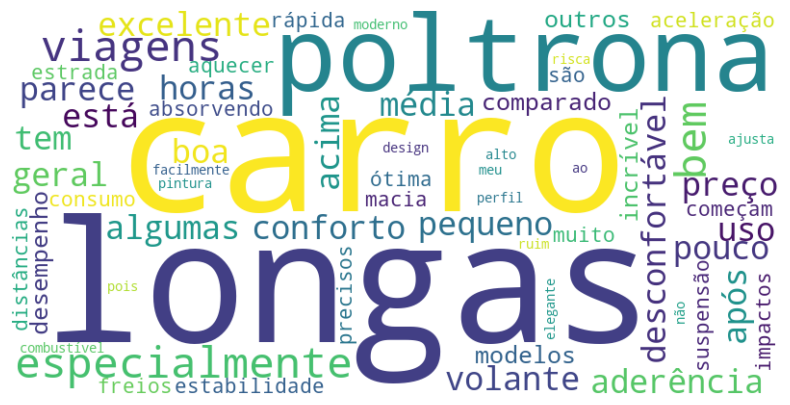

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unindo todos os comentários processados
all_comments = ' '.join(df_simulado['comentario_processado'])

# Gerando a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_comments)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## TF-iDF para score de frases

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inicializando o TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(2, 3))  # Analisando bi-gramas e tri-gramas

# Ajustando o TF-IDF nos comentários
X_tfidf = tfidf_vectorizer.fit_transform(df_simulado['comentario'])

# Pegando os termos (bi-gramas/tri-gramas) e suas respectivas frequências TF-IDF
terms = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.toarray().sum(axis=0)

# Criando um DataFrame para organizar os termos e seus scores TF-IDF
df_frases_importantes = pd.DataFrame({'frase': terms, 'tfidf_score': tfidf_scores})

# Ordenando os termos pelos seus scores TF-IDF em ordem decrescente
df_frases_importantes = df_frases_importantes.sort_values(by='tfidf_score', ascending=False)

# Exibindo as frases mais importantes
print(df_frases_importantes.head(10))


                             frase  tfidf_score
77                  parece pequeno     0.333333
45          elegante pintura risca     0.333333
34             consumo combustível     0.333333
68                moderno elegante     0.333333
69        moderno elegante pintura     0.333333
40                  design moderno     0.333333
28  combustível alto especialmente     0.333333
27                combustível alto     0.333333
41         design moderno elegante     0.333333
78              parece pequeno tem     0.333333


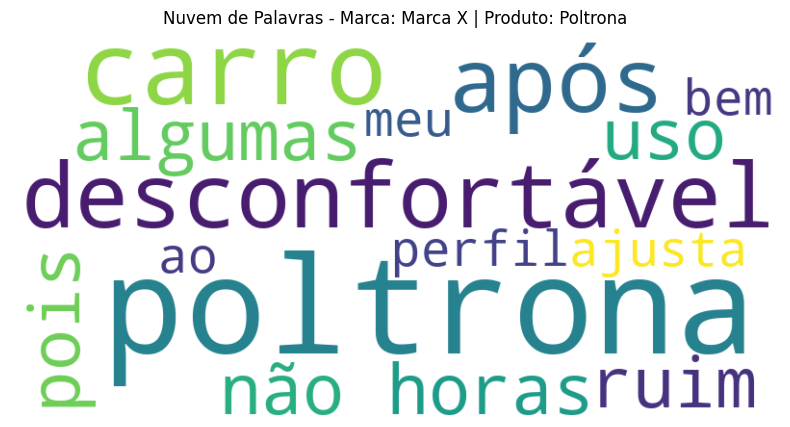

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Função para gerar nuvem de palavras filtrada por marca e produto
def gerar_nuvem_por_marca_produto(df, marca, produto):
    # Filtrando o DataFrame pela marca e produto
    df_filtrado = df[(df['marca'] == marca) & (df['produto'] == produto)]
    
    # Unindo todos os comentários processados filtrados
    all_comments = ' '.join(df_filtrado['comentario_processado'])
    
    # Gerando a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_comments)
    
    # Exibindo a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuvem de Palavras - Marca: {marca} | Produto: {produto}")
    plt.show()

# Exemplo de uso para gerar nuvem de palavras para Marca X e Produto Poltrona
gerar_nuvem_por_marca_produto(df_simulado, 'Marca X', 'Poltrona')


## Análise de Sentimentos usando BERT

Como funciona o BERT:
O BERT (Bidirectional Encoder Representations from Transformers) é um modelo de deep learning baseado em uma arquitetura chamada Transformer, que foi projetada para lidar com o processamento de linguagem natural (PLN)

1. Tokenização:
O primeiro passo é transformar o texto em tokens (pequenas unidades de texto, como palavras ou partes de palavras) que o BERT entende. Esses tokens são numéricos, e representam palavras ou pedaços de palavras.

2. Contextualização das palavras:
O BERT é bidirecional, o que significa que ele analisa cada palavra levando em consideração as palavras ao redor, tanto à esquerda quanto à direita. Por exemplo, em uma frase como "O filme foi muito bom", o BERT analisa o contexto de "bom" com base nas palavras "filme" e "muito", permitindo uma interpretação mais precisa do sentimento.

3. Saída:
A saída final do BERT na análise de sentimento é uma classificação (por exemplo, positivo, neutro ou negativo) e um score de confiança, que representa a certeza do modelo em relação à sua classificação.

In [7]:
from transformers import pipeline

# Carregando o pipeline de análise de sentimento com BERT
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Aplicando o BERT para análise de sentimento nos comentários processados
df_simulado['resultado_bert'] = df_simulado['comentario_processado'].apply(lambda x: sentiment_analysis(x)[0])

# Separando os resultados em sentimento e score
df_simulado['label_bert'] = df_simulado['resultado_bert'].apply(lambda x: x['label'])
df_simulado['score_bert'] = df_simulado['resultado_bert'].apply(lambda x: x['score'])

# Exibindo os resultados
print(df_simulado[['comentario', 'comentario_processado', 'label_bert', 'score_bert']])


c:\Users\elder\Stellantis\bi\estudo_verbatins_ncbs\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                          comentario  \
0  A poltrona do carro é desconfortável após algu...   
1  O volante parece pequeno, mas tem uma boa ader...   
2  O conforto geral do carro é excelente, especia...   
3  O preço está um pouco acima da média comparado...   
4  O desempenho do carro é incrível, com aceleraç...   
5  A suspensão é muito macia, absorvendo bem os i...   
6  Os freios são precisos, mas em longas distânci...   
7  O consumo de combustível é alto, especialmente...   
8  A poltrona do é ruim, pois não ajusta bem ao m...   
9  O design é moderno e elegante, mas a pintura r...   

                               comentario_processado label_bert  score_bert  
0  poltrona carro desconfortável após algumas hor...     1 star    0.503560  
1           volante parece pequeno tem boa aderência    4 stars    0.472032  
2  conforto geral carro excelente especialmente l...    5 stars    0.615561  
3  preço está pouco acima média comparado outros ...    3 stars    0.53

### Percentual dos dados:

In [8]:
# Função para agrupar os sentimentos em Positivo, Negativo e Neutro
def agrupar_sentimento(label):
    if label in ['4 stars', '5 stars']:
        return 'Positivo'
    elif label == '3 stars':
        return 'Neutro'
    else:
        return 'Negativo'

# Aplicando a função de agrupamento
df_simulado['categoria_sentimento'] = df_simulado['label_bert'].apply(agrupar_sentimento)

# Calculando os percentuais de Positivo, Neutro e Negativo
percentuais_categoria = df_simulado['categoria_sentimento'].value_counts(normalize=True) * 100

# Exibindo os percentuais
print("Percentual dos dados: ")
print(percentuais_categoria)


Percentual dos dados: 
categoria_sentimento
Positivo    50.0
Neutro      30.0
Negativo    20.0
Name: proportion, dtype: float64


In [9]:
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Baixando as stop words em português (caso não tenha baixado ainda)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Lista de stop words em português
stop_words_portuguese = stopwords.words('portuguese')

# Função para identificar os tópicos usando LDA (com stop words em português)
def identificar_topicos(comentarios, num_topicos=3, num_palavras=5):
    # Ajuste dos parâmetros de max_df e min_df
    vectorizer = CountVectorizer(max_df=2, min_df=1, stop_words=stop_words_portuguese)
    X = vectorizer.fit_transform(comentarios)

    # Criando o dicionário e corpus para LDA
    termos = vectorizer.get_feature_names_out()
    corpus = X.T.dot(X).todense()
    corpus = [[termos[j] for j in range(len(termos))] for i in range(len(corpus))]

    # Preparando o corpus para LDA
    id2word = corpora.Dictionary(corpus)
    corpus = [id2word.doc2bow(texto) for texto in corpus]

    # Aplicando o LDA
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topicos, random_state=100,
                         update_every=1, chunksize=10, passes=10, alpha='auto')

    # Exibindo os tópicos identificados
    topicos = lda_model.print_topics(num_words=num_palavras)
    for topico in topicos:
        print(f"Tópico {topico[0]}: {topico[1]}")


# 1. Filtrar comentários positivos e aplicar LDA
print("Comentários positivos: ")
comentarios_positivos = df_simulado[df_simulado['label_bert'].isin(['4 stars', '5 stars'])]['comentario_processado']
identificar_topicos(comentarios_positivos, num_topicos=3, num_palavras=5)
print("Comentários negativos: ")
# 2. Filtrar comentários negativos e aplicar LDA
comentarios_negativos = df_simulado[df_simulado['label_bert'].isin(['1 star', '2 stars'])]['comentario_processado']
identificar_topicos(comentarios_negativos, num_topicos=3, num_palavras=5)


Comentários positivos: 
Tópico 0: 0.034*"design" + 0.034*"risca" + 0.034*"volante" + 0.034*"começam" + 0.034*"boa"
Tópico 1: 0.034*"especialmente" + 0.034*"geral" + 0.034*"pequeno" + 0.034*"design" + 0.034*"longas"
Tópico 2: 0.034*"viagens" + 0.034*"rápida" + 0.034*"pequeno" + 0.034*"distâncias" + 0.034*"aceleração"
Comentários negativos: 
Tópico 0: 0.083*"poltrona" + 0.083*"após" + 0.083*"horas" + 0.083*"desconfortável" + 0.083*"carro"
Tópico 1: 0.083*"ajusta" + 0.083*"algumas" + 0.083*"pois" + 0.083*"perfil" + 0.083*"uso"
Tópico 2: 0.083*"uso" + 0.083*"horas" + 0.083*"ruim" + 0.083*"bem" + 0.083*"ajusta"


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Resumo por tópicos 

In [10]:
import pandas as pd
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaModel
from transformers import pipeline
import nltk

# Baixar stopwords em português, se necessário
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_portuguese = stopwords.words('portuguese')

# Função para identificar tópicos usando LDA
def identificar_topicos(comentarios, num_topicos=2, num_palavras=5):
    vectorizer = CountVectorizer(max_df=3, min_df=1, stop_words=stop_words_portuguese)
    X = vectorizer.fit_transform(comentarios)
    
    termos = vectorizer.get_feature_names_out()
    corpus = X.T.dot(X).todense()
    corpus = [[termos[j] for j in range(len(termos))] for i in range(len(corpus))]
    
    id2word = corpora.Dictionary(corpus)
    corpus = [id2word.doc2bow(texto) for texto in corpus]
    
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topicos, random_state=100,
                         update_every=1, chunksize=10, passes=10, alpha='auto')
    
    topicos = lda_model.print_topics(num_words=num_palavras)
    topico_resumo = []
    for topico in topicos:
        topico_resumo.append(f"Tópico {topico[0]}: {topico[1]}")
    return topico_resumo

# Função para resumir os comentários
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def gerar_resumo(comentarios, max_length=100, min_length=30):
    texto_completo = ' '.join(comentarios)
    resumo = summarizer(texto_completo, max_length=max_length, min_length=min_length, do_sample=False)
    return resumo[0]['summary_text']

# Função para gerar resumos categorizados por produto
def resumo_por_produto(df):
    produtos = df['produto'].unique()
    for produto in produtos:
        print(f"\nResumo para o produto: {produto}")
        
        # Filtrar comentários do produto
        comentarios_produto = df[df['produto'] == produto]['comentario_processado'].tolist()
        
        # Identificar tópicos
        topicos = identificar_topicos(comentarios_produto, num_topicos=2)
        print("Principais Tópicos:")
        for topico in topicos:
            print(topico)
        
        # Gerar resumo dos comentários
        resumo = gerar_resumo(comentarios_produto)
        print("\nResumo dos Comentários:")
        print(resumo)

# Exemplo de execução da função
resumo_por_produto(df_simulado)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\elder\Stellantis\bi\estudo_verbatins_ncbs\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Your max_length is set to 100, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)



Resumo para o produto: Poltrona
Principais Tópicos:
Tópico 0: 0.100*"poltrona" + 0.091*"após" + 0.088*"horas" + 0.087*"desconfortável" + 0.086*"carro"
Tópico 1: 0.094*"ajusta" + 0.087*"algumas" + 0.084*"uso" + 0.084*"pois" + 0.084*"bem"


Your max_length is set to 100, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)



Resumo dos Comentários:
Poltrona carro desconfortável após algumas horas uso. "Não ajusta bem ao meu perfil"

Resumo para o produto: Volante
Principais Tópicos:
Tópico 0: 0.216*"boa" + 0.211*"parece" + 0.201*"volante" + 0.200*"pequeno" + 0.171*"aderência"
Tópico 1: 0.214*"aderência" + 0.200*"pequeno" + 0.199*"volante" + 0.195*"parece" + 0.192*"boa"


Your max_length is set to 100, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)



Resumo dos Comentários:
a. volante parece pequeno tem boa aderência. Volante volante. volantes volante volant. volente volantevolante volente. volant volante, volente, volant, volante,. volante and volante de. vol.

Resumo para o produto: Conforto
Principais Tópicos:
Tópico 0: 0.161*"especialmente" + 0.160*"geral" + 0.160*"excelente" + 0.143*"conforto" + 0.131*"longas"
Tópico 1: 0.149*"carro" + 0.148*"viagens" + 0.146*"longas" + 0.143*"conforto" + 0.138*"excelente"


Your max_length is set to 100, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)



Resumo dos Comentários:
Carro excelente especialmente longas viagens. Conforto geral carro excelent especificado.

Resumo para o produto: Preço
Principais Tópicos:
Tópico 0: 0.161*"modelos" + 0.160*"outros" + 0.160*"média" + 0.143*"comparado" + 0.131*"pouco"
Tópico 1: 0.149*"acima" + 0.148*"preço" + 0.146*"pouco" + 0.143*"comparado" + 0.138*"média"


Your max_length is set to 100, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)



Resumo dos Comentários:
a. Preço está pouco acima média comparado to outros modelos. Modelo A3 can be preordered on Amazon.com.

Resumo para o produto: Desempenho
Principais Tópicos:
Tópico 0: 0.161*"desempenho" + 0.160*"incrível" + 0.160*"estabilidade" + 0.143*"carro" + 0.131*"rápida"
Tópico 1: 0.149*"aceleração" + 0.148*"ótima" + 0.146*"rápida" + 0.143*"carro" + 0.138*"estabilidade"


Your max_length is set to 100, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)



Resumo dos Comentários:
Aceleração rápida ótima estabilidade. desempenho carro incrível.

Resumo para o produto: Suspensão
Principais Tópicos:
Tópico 0: 0.178*"suspensão" + 0.171*"impactos" + 0.168*"estrada" + 0.167*"macia" + 0.164*"bem"
Tópico 1: 0.188*"absorvendo" + 0.170*"bem" + 0.165*"macia" + 0.165*"estrada" + 0.161*"impactos"


Your max_length is set to 100, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)



Resumo dos Comentários:
inais. suspensão muito macia absorvendo bem impactos estrada. Suspensão.

Resumo para o produto: Freios
Principais Tópicos:
Tópico 0: 0.178*"precisos" + 0.171*"freios" + 0.168*"distâncias" + 0.167*"longas" + 0.164*"começam"
Tópico 1: 0.188*"aquecer" + 0.170*"começam" + 0.165*"longas" + 0.165*"distâncias" + 0.161*"freios"


Your max_length is set to 100, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)



Resumo dos Comentários:
"Os freios são precisos longas distâncias começam aquecer" "O misterio está mais importante" "Não faz parte de mensagens, não fazer parte of mensas" "A mensageião é muito importante.

Resumo para o produto: Consumo
Principais Tópicos:
Tópico 0: 0.178*"viagens" + 0.171*"especialmente" + 0.168*"consumo" + 0.167*"longas" + 0.164*"combustível"
Tópico 1: 0.188*"alto" + 0.170*"combustível" + 0.165*"longas" + 0.165*"consumo" + 0.161*"especialmente"


Your max_length is set to 100, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)



Resumo dos Comentários:
. consumo combustível alto especialmente viagens longas. Consumo combustible alto alto.

Resumo para o produto: Design
Principais Tópicos:
Tópico 0: 0.178*"risca" + 0.171*"moderno" + 0.168*"facilmente" + 0.167*"pintura" + 0.164*"elegante"
Tópico 1: 0.188*"design" + 0.170*"elegante" + 0.165*"pintura" + 0.165*"facilmente" + 0.161*"moderno"

Resumo dos Comentários:
. design moderno elegante pintura risca facilmente. Design moderno, moderno and moderno.
